### this project will use RandomForest as a classsifier  

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#load the dataset
df = pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/train.csv')

In [12]:
df.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
6756,0.234990,-0.002459,0.006359,-0.044482,-0.376708,-0.322625,-0.125431,-0.404641,-0.313461,0.415783,...,0.307292,0.091329,-0.693022,-0.917803,-0.591694,-0.877101,0.142149,-0.058755,29,WALKING_DOWNSTAIRS
5280,0.276759,-0.018366,-0.108147,-0.997715,-0.988613,-0.986902,-0.997869,-0.988753,-0.987023,-0.943721,...,-0.898860,0.077992,0.019583,0.548176,0.583993,-0.839735,0.191492,-0.044411,25,STANDING
504,0.298055,-0.031432,-0.157311,-0.231752,0.024239,-0.317321,-0.268426,0.012792,-0.300729,-0.189661,...,-0.688827,-0.321909,0.229501,0.962017,-0.716872,-0.594069,0.357102,0.124777,3,WALKING_UPSTAIRS
1250,0.269674,0.010907,-0.074949,-0.336640,0.146250,-0.445571,-0.410055,0.152956,-0.445406,-0.158372,...,-0.322109,0.143221,-0.106539,0.527231,-0.847273,-0.804775,0.229686,-0.013299,6,WALKING
5920,0.275269,-0.018388,-0.099992,-0.990138,-0.980062,-0.970626,-0.990469,-0.980637,-0.966768,-0.938807,...,-0.649462,-0.137869,0.013905,-0.428812,0.408837,-0.315961,-0.205348,-0.336134,27,SITTING


In [13]:
df.shape

(7352, 563)

In [14]:
#preprocessing the dataset
X = df.drop('Activity',axis = 1)

In [15]:
y = df['Activity']

In [17]:
#spliting the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [18]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [20]:
hist = model.fit(x_train,y_train)

In [21]:
y_pred = model.predict(x_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred, )
precision = precision_score(y_test, y_pred, average = 'macro'  )
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

In [26]:
print(f'accuracy: {accuracy}')
print(f'presicion: {precision}')
print(f'recall: {recall}')
print(f'f1 score: {f1}')

accuracy: 0.9802855200543847
presicion: 0.9805965457126319
recall: 0.9808700264002653
f1 score: 0.980709439998963


In [27]:
cm = confusion_matrix(y_test,y_pred)

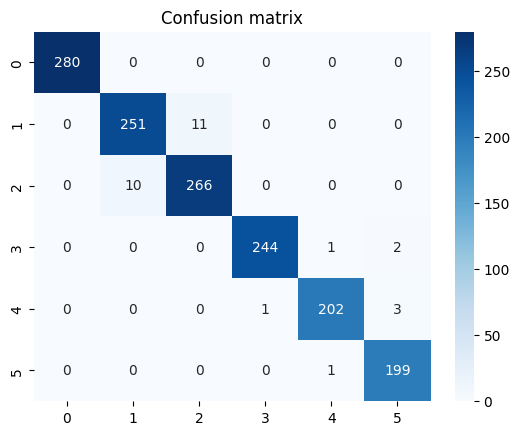

In [28]:
sns.heatmap(cm,annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion matrix')
plt.show()